<img src="escuela_economia_una_logo.png" width="260" height="60">
<center>
    <b>Econometría</b><br>
    <b>Profesor:  Alexander Amoretti</b><br>
    <b>Desarrollo:  Diego Armando Barquero Sánchez, Estudiante de Tercer Ciclo</b>
<br><br>   
<div style="font-size:200%;color:white; background-color: #A93226;">Regresión Lineal Multiple</div>
<div style="font-size:100%;color:white; background-color: #A93226;">Empleando el TAM y PIBPC como variables explicativa</div>

<i>Creado:     2023-May-22 
    <br>
    Actualizado: 2023-Jun-09  </i>

# Librerías Empleadas

In [1]:

# Basics for Data Analysis 
import numpy as np
import pandas as pd
# Basics for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# regression basics 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms


# Datos

### *Se implementa la librería  pandas para cargar un set de datos*

In [2]:
datos = pd.read_excel('datos.xlsx')


### *Se implementa la librería  pandas para visualizar el set de datos y ver con cuales variables estaremos trabajando*

In [4]:
datos


,MI,TAM,PIBPC
0,128,37,1870
1,204,22,130
2,202,16,310
3,197,65,570
4,96,76,2050
...,...,...,...
59,115,62,1470
60,186,45,300
61,47,85,3630
62,178,45,220


In [5]:
datos.shape

(64, 3)

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MI      64 non-null     int64
 1   TAM     64 non-null     int64
 2   PIBPC   64 non-null     int64
dtypes: int64(3)
memory usage: 1.6 KB


### *Como son datos transversales no se realizará un cambio en el índice del DataFrame*

## *Análisis Exploratorio de Datos*

In [8]:
# Creación de un Boxplot e Histograma con la misma escala .


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot e Histogram combinados

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

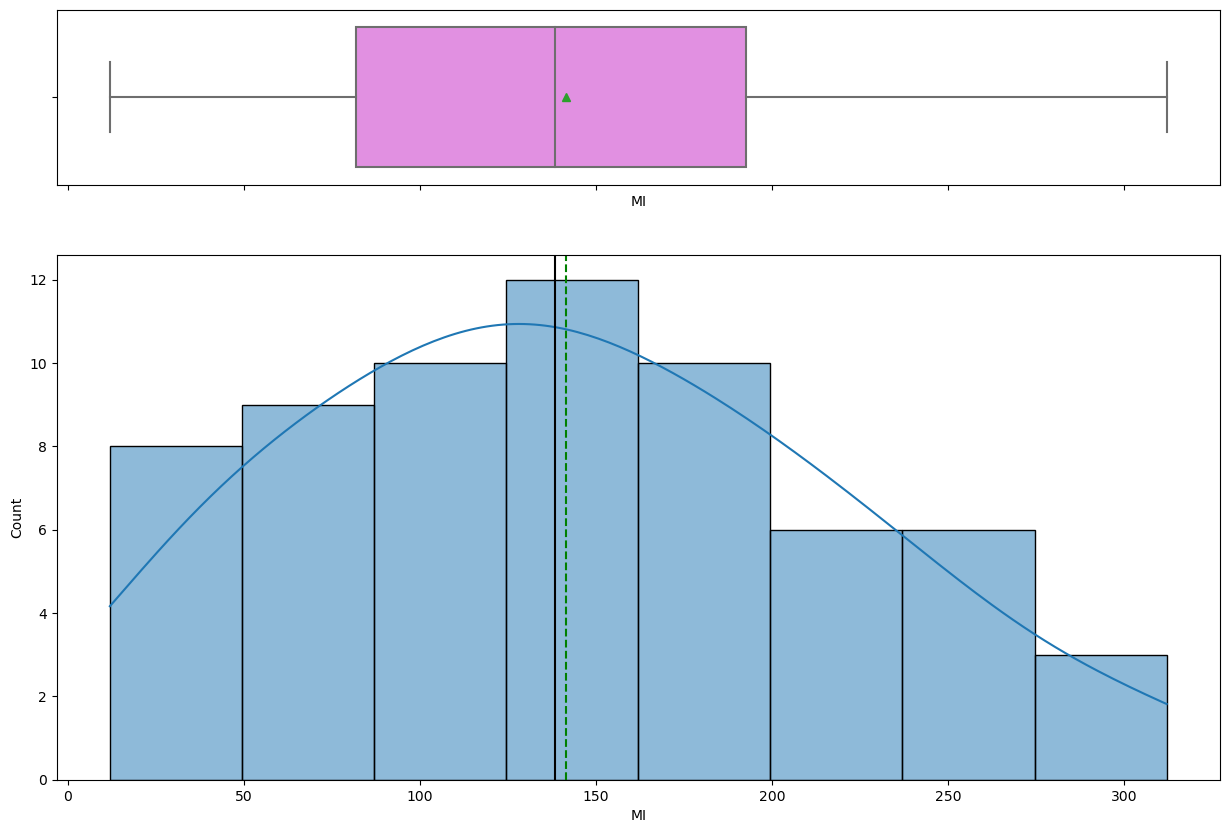

In [17]:
histogram_boxplot(datos, "MI", kde=True) # visualizamos la variable dependiente 

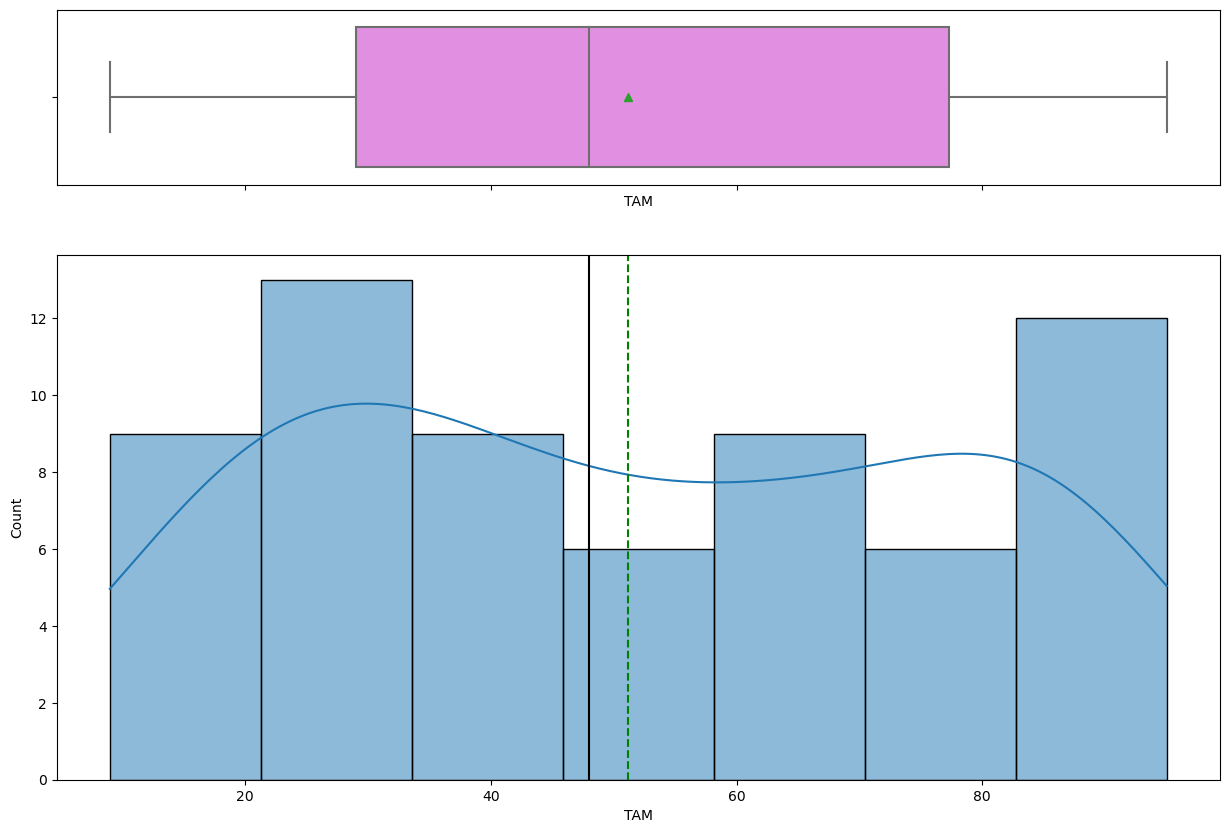

In [18]:
histogram_boxplot(datos, "TAM", kde=True) # visualizamos la variable explicativa TAM

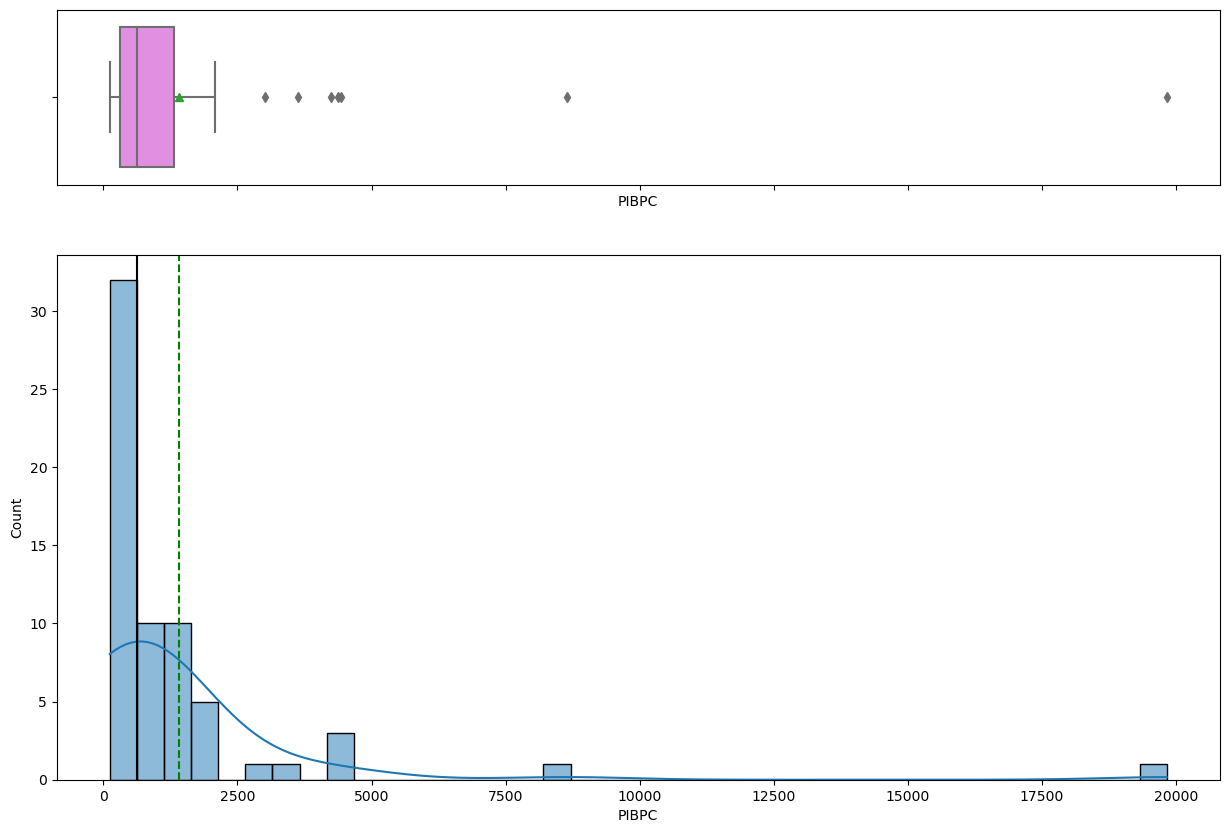

In [19]:
histogram_boxplot(datos, "PIBPC", kde=True) # visualizamos la variable explicativa PIBPC

### *Matriz de correlación*

In [11]:
lista_de_columnas = datos.select_dtypes(include=np.number).columns.tolist()
lista_de_columnas

['MI', 'TAM', 'PIBPC']

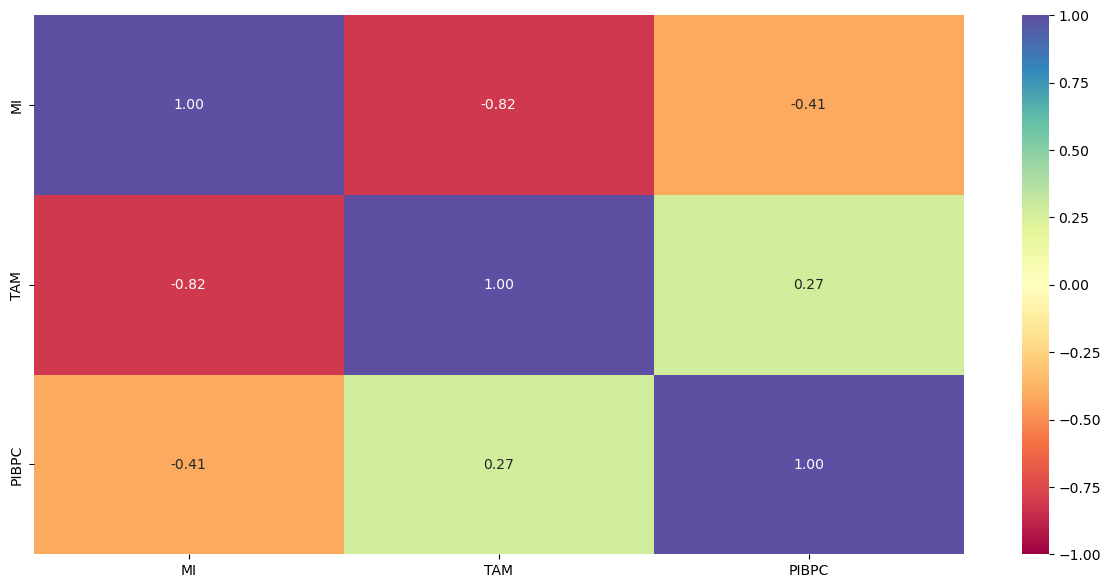

In [16]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    datos[lista_de_columnas].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Visualización de los valores átipicos

In [20]:
columnas = datos.select_dtypes(include=np.number).columns.tolist()
columnas

['MI', 'TAM', 'PIBPC']

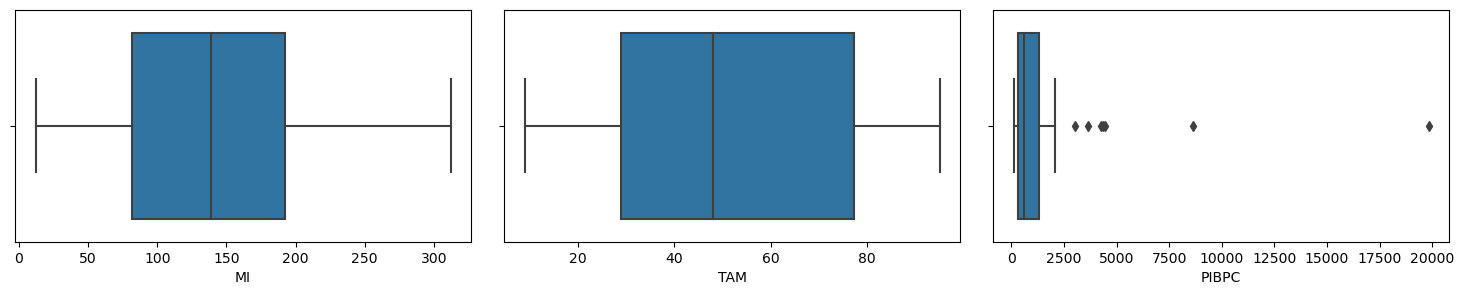

In [21]:

plt.figure(figsize=(15, 15))

for i, variable in enumerate(columnas):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=datos, x=variable)
    plt.tight_layout(pad=2)

plt.show()

# Regresión Lineal Multiple

$ yi=β0+β1xi1+β2xi2+...+βpxip+ϵi $

### *Para realizar la regresión lineal simple, se implementarán las variables TAM y PIB_P como  variables exógenas o explicativas. A su vez se hará uso de la librería statsmodels para el proceso de proyección y análisis de resultados*

In [27]:
# Define la variable dependiente 
y = datos['MI']

# Define la variable explicativa 
x = datos[["TAM","PIBPC"]]

# Se agrega la variable constante
x = sm.add_constant(x)

# Se realiza la regresion como tal 
model = sm.OLS(y, x).fit()

# Se imprime los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     MI   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           5.12e-17
Time:                        17:40:42   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

### *Como se observa en los resultados de la regresión, las variables explicativas (TAM y PIBPC) son significativas en la columna P>]t[ a un nivel de significancia de 0.05.*

# Pruebas

In [28]:
# Creamos una base de datos a para realizar algunas pruebas y gráficos  
datos_f = pd.DataFrame()

datos_f["Reales"] = y  # yi
datos_f["Aprox"] = model.fittedvalues  # y^
datos_f["Residuos"] = model.resid  # ut

datos_f.head()

,Reales,Aprox,Residuos
0,128,170.513781,-42.513781
1,204,213.812642,-9.812642
2,202,226.185770,-24.185770
3,197,115.369954,81.630046
4,96,82.465551,13.534449


## -*Linealidad*-

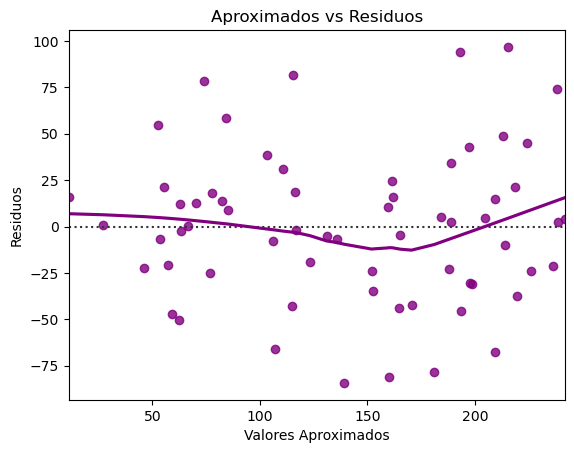

In [29]:
# let's plot the fitted values vs residuals
sns.residplot(
    data=datos_f, x="Aprox", y="Residuos", color="purple", lowess=True
)
plt.xlabel("Valores Aproximados")
plt.ylabel("Residuos")
plt.title("Aproximados vs Residuos")
plt.show()

*Es relativamente lineal*

## -*Normalidad*-

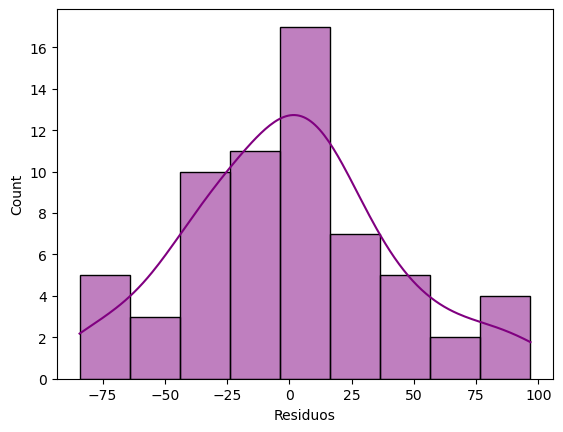

In [31]:
sns.histplot(data = datos_f, x = "Residuos", kde = True, color = "purple");

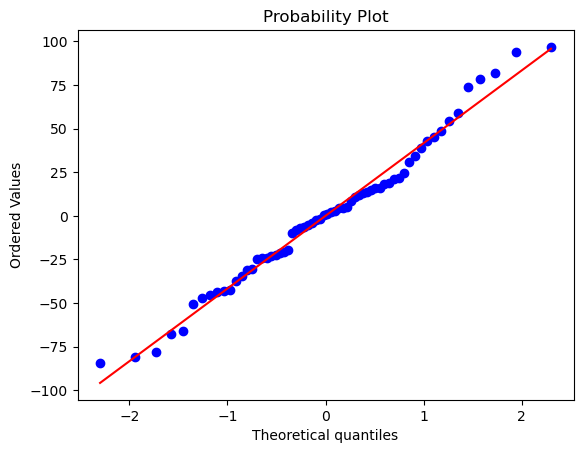

In [32]:
import pylab
import scipy.stats as stats

stats.probplot(
    datos_f["Residuos"], dist="norm", plot=pylab
)  # gráfico de quantile-quantile plot 
plt.show()

In [34]:
JB_pv = sm.stats.stattools.jarque_bera(model.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.7560086748021745


*La prueba de JB junto con los gráficos nos afirman que los residuos siguen un comportamiento normal*

## -*Heterocedasticidad*-

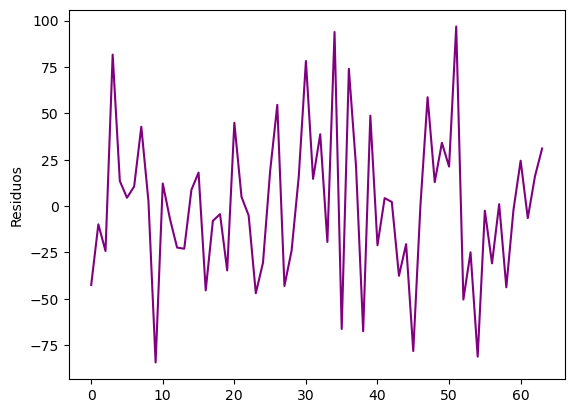

In [35]:
sns.lineplot(data = datos_f, x = datos_f.index, y = "Residuos", color = "purple");

In [37]:
Nombres = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
BP_results = sms.het_breuschpagan(model.resid, model.model.exog)
 
lzip(Nombres, BP_results)


[('Lagrange multiplier statistic', 1.5915817271001416),
 ('p-value', 0.45122423697093705),
 ('f-value', 0.7778316454726383),
 ('f p-value', 0.4639035010068211)]

## -*Autocorrelación*-

In [40]:
sm.stats.stattools.durbin_watson(model.resid, axis=0)

2.18615946699298

## -*Multicolinealidad*-

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [44]:
checking_vif(x)

,feature,VIF
0,const,4.935348
1,TAM,1.077712
2,PIBPC,1.077712


## -*Herramienta visual*-
*El código es complejo, sin embargo bastante útil debido a que en muchas ocaciones tenemos que hacer uso de funciones creadas por un desarrollador individual debido a que muchas de las funciones establecidas en otros lenguajes como r o stata en python siguen en desarrollo por parte de las grandes librerías como QuantEcon o Statsmodels*

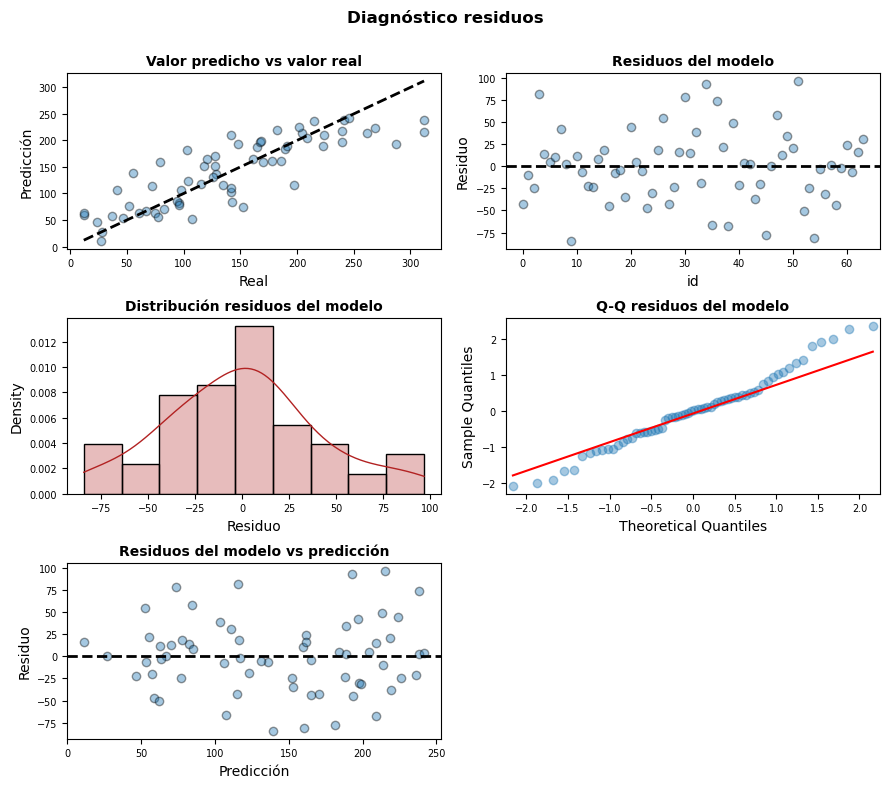

In [45]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y, model.fittedvalues, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y))), datos_f["Residuos"] ,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = datos_f["Residuos"] ,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot( 
    datos_f["Residuos"] ,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(model.fittedvalues,  datos_f["Residuos"] ,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


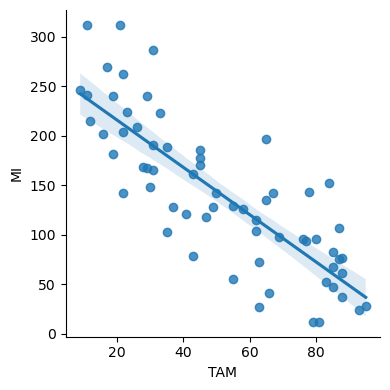

In [47]:
sns.lmplot(data = datos, x = "TAM", y = "MI", height = 4);

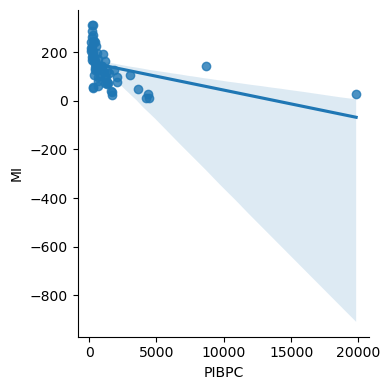

In [49]:
sns.lmplot(data = datos, x = "PIBPC", y = "MI", height = 4);

# Aproximados
#### *Se puede graficar que tan cerca se encontrarón los datos estimados de los observados*

In [51]:
datos["AproxMI"] = model.fittedvalues


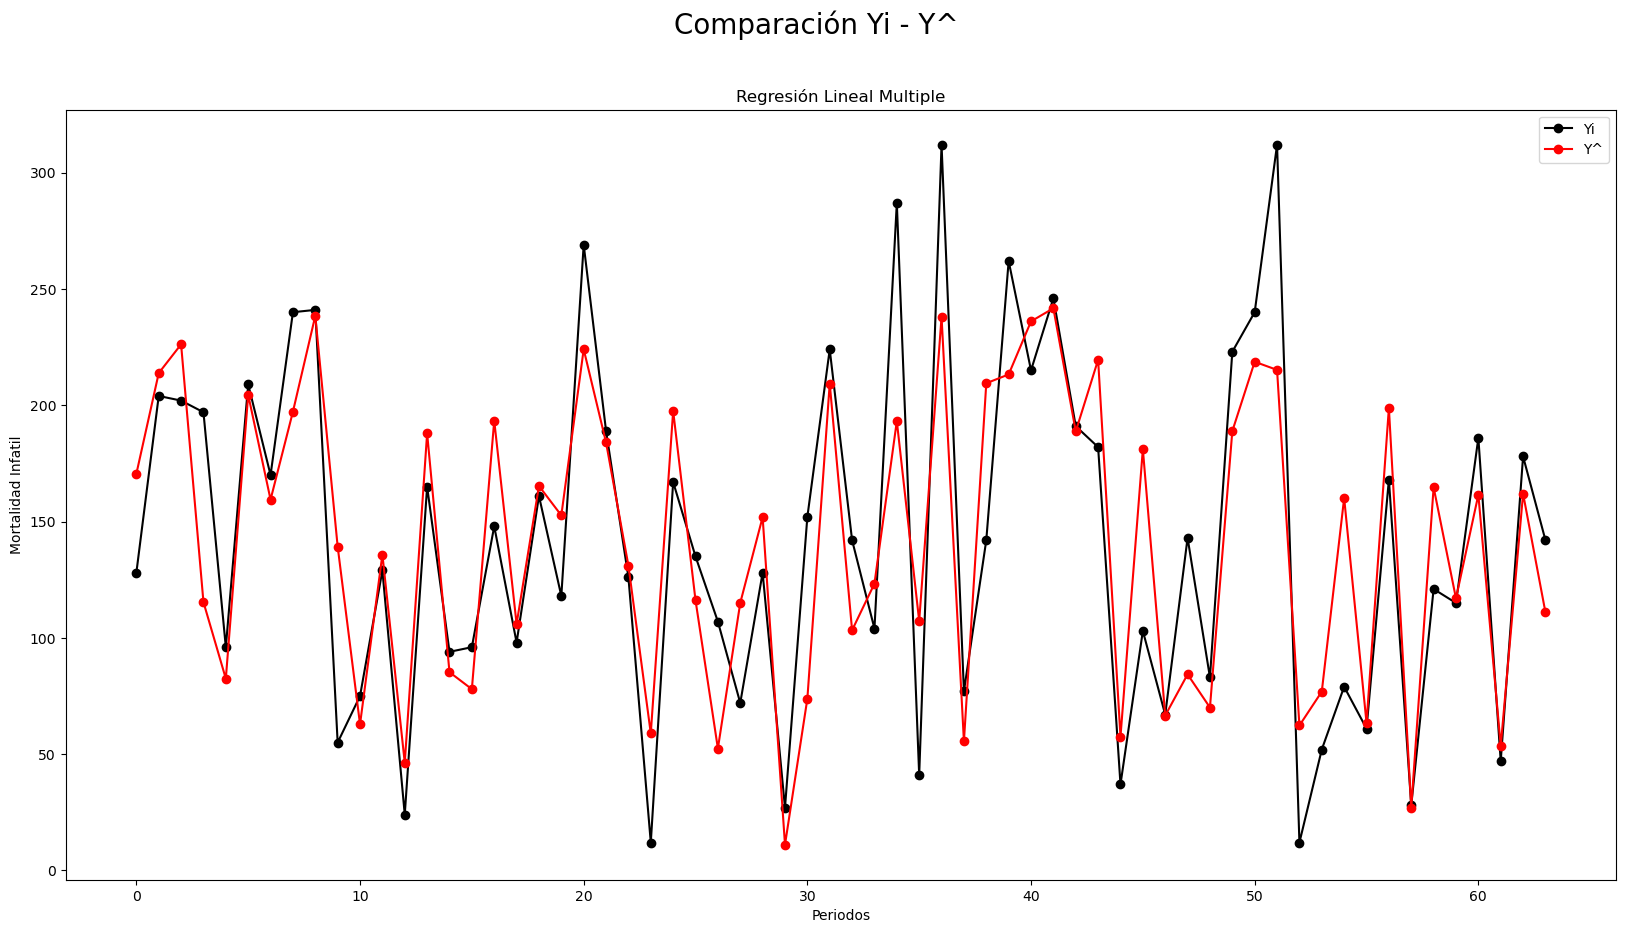

In [52]:
fig, (ax1) = plt.subplots(1,1, figsize = (20,10))
fig.suptitle('Comparación Yi - Y^', fontsize =20)
ax1.plot(datos.index, datos['MI'], '-o',  color = 'black', label = 'Yi')
ax1.plot(datos.index, datos['AproxMI'], '-o',  color = 'red', label = 'Y^')
ax1.set(xlabel= 'Periodos', ylabel= 'Mortalidad Infatil')
ax1.set_title('Regresión Lineal Multiple')
ax1.legend(loc='best');

# Bibliografía y Documentación de las Librerías

##### Referencias Bibliográficas

*Carrasquilla-Batista, A., Chacon-Rodriguez, A., Núñez-Montero, K., Gómez-Espinoza, O., Valverde-Cerdas, J., & Guerrero-Barrantes, M. (2016). Regresión lineal simple y múltiple: aplicación en la predicción de variables naturales relacionadas con el crecimiento microalgal. Tecnología en Marcha. https://doi.org/10.18845/tm.v29i8.2983*

*Regresión lineal con python. (s. f.). https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html*

*profesorDATA. (2020). Métodos de Selección de Variables: El Factor de Inflación de la Varianza. profesorDATA.com. https://profesordata.com/2020/08/22/metodos-de-seleccion-de-variables-el-factor-de-inflacion-de-la-varianza/*

*GeeksforGeeks. (2022). How to Perform a Breusch Pagan Test in Python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/*

*Randall-Romero. (s. f.). EC4301/Laboratorios at master · randall-romero/EC4301. GitHub. https://github.com/randall-romero/EC4301/tree/master/Laboratorios*

##### Documentación Librerías
- Numpy : https://numpy.org/doc/stable/
- Pandas : https://pandas.pydata.org/docs/getting_started/index.html
- Statsmodels : https://www.statsmodels.org/devel/index.html
- Matplotlib : https://matplotlib.org/stable/gallery/index.html
- Seaborn : https://seaborn.pydata.org/
- Scikit-Learn : https://scikit-learn.org/stable/